# EJERCICIOS

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization,Dropout
from keras.initializers import HeNormal,lecun_normal
from keras.activations import swish, selu

In [2]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


I0000 00:00:1737418506.342107    6568 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737418506.366918    6568 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737418506.367118    6568 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [4]:
# Fusionar todos los datos para dividir posteriormente
x_total = np.concatenate((x_train, x_test))
y_total = np.concatenate((y_train, y_test))

# Dividir el conjunto completo en 50,000 para entrenamiento y 10,000 para validación + test
x_train, x_temp, y_train, y_temp = train_test_split(x_total, y_total, test_size=10000, random_state=42)

# Dividir los 10,000 restantes en 5,000 para validación y 5,000 para test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=5000, random_state=42)

# Imprimir las formas resultantes
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (50000, 32, 32, 3)
Forma de x_val: (5000, 32, 32, 3)
Forma de x_test: (5000, 32, 32, 3)


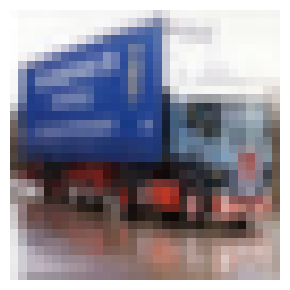

In [6]:
plt.figure(figsize=(3, 3))
plt.imshow(x_train[0])
plt.axis('off')
plt.tight_layout()
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [5]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model = Sequential()
model.add(Input(shape=(32, 32,3)))
model.add(Flatten())
for _ in range(20):
    model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))
    




I0000 00:00:1737418518.244420    6568 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737418518.244609    6568 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737418518.244680    6568 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737418518.297771    6568 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [6]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
dicc=[]
histories=[]
models=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    dicc.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models.append(model)

Epoch 1/45


I0000 00:00:1737418525.699448    7591 service.cc:146] XLA service 0x7ae7bc014240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737418525.699495    7591 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-21 01:15:25.842628: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-21 01:15:26.081004: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 102/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 53.9878 - sparse_categorical_accuracy: 0.1183

I0000 00:00:1737418526.845980    7591 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 9.0767 - sparse_categorical_accuracy: 0.1575 - val_loss: 2.0738 - val_sparse_categorical_accuracy: 0.2178
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.0309 - sparse_categorical_accuracy: 0.2549 - val_loss: 1.9181 - val_sparse_categorical_accuracy: 0.3022
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.9108 - sparse_categorical_accuracy: 0.3014 - val_loss: 1.8569 - val_sparse_categorical_accuracy: 0.3256
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8485 - sparse_categorical_accuracy: 0.3302 - val_loss: 1.8087 - val_sparse_categorical_accuracy: 0.3454
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7913 - sparse_categorical_accuracy: 0.3529 - val_loss: 1.7665 - val_sparse_categorical_accuracy: 0.3550
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7428 - sparse_categorical_accuracy: 0.3655 - val_loss: 1.7435 - val_sparse_categorical_accuracy: 0.3658
Epo

In [7]:
for entry in dicc:
    print(f"ID del modelo: {entry['ID']}")
    print(f"Tasa de aprendizaje: {entry['LR']}")
    print(f"Precisión en entrenamiento: {entry['sparse categorical accuracy training']}")
    print(f"Precisión en validación: {entry['sparse categorical accuracy validation']}")
    print(f"Tiempo de Ejecucuón: {entry['Tiempo Total(s)']}")
    print("-------------------------------------------------")

ID del modelo: 0
Tasa de aprendizaje: 0.0001
Precisión en entrenamiento: 0.5235199928283691
Precisión en validación: 0.40799999237060547
Tiempo de Ejecucuón: 99.80099201202393
-------------------------------------------------
ID del modelo: 1
Tasa de aprendizaje: 0.0003
Precisión en entrenamiento: 0.5322200059890747
Precisión en validación: 0.436599999666214
Tiempo de Ejecucuón: 99.09315919876099
-------------------------------------------------
ID del modelo: 2
Tasa de aprendizaje: 0.0007
Precisión en entrenamiento: 0.49709999561309814
Precisión en validación: 0.460999995470047
Tiempo de Ejecucuón: 104.84605097770691
-------------------------------------------------
ID del modelo: 3
Tasa de aprendizaje: 0.001
Precisión en entrenamiento: 0.43814000487327576
Precisión en validación: 0.4185999929904938
Tiempo de Ejecucuón: 104.6996476650238
-------------------------------------------------
ID del modelo: 4
Tasa de aprendizaje: 0.003
Precisión en entrenamiento: 0.09933999925851822
Precisi

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [8]:
mejor_val = 0
mejor_modelo = None
mejor_resultado = None

for entry in dicc:
    train_precision = entry['sparse categorical accuracy training']
    val_precision = entry['sparse categorical accuracy validation']
    
    if val_precision > mejor_val:
        mejor_modelo=entry['ID']
        mejor_precision = train_precision
        mejor_val = val_precision
        mejor_lr = entry['LR']
        mejor_tiempo = entry['Tiempo Total(s)']

# Mostrar los resultados del mejor modelo
print("Resultados del mejor mpodelo:")
print(f"ID del modelo: {mejor_modelo}")
print("Tasa de aprendizaje:",mejor_lr )
print("sparse categorical accuracy training:",mejor_precision )
print("sparse categorical accuracy validation:",mejor_val )
print("Tiempo de Entrenamiento:",mejor_tiempo )


Resultados del mejor mpodelo:
ID del modelo: 2
Tasa de aprendizaje: 0.0007
sparse categorical accuracy training: 0.49709999561309814
sparse categorical accuracy validation: 0.460999995470047
Tiempo de Entrenamiento: 104.84605097770691


In [9]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=mejor_lr)
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

best_model = Sequential()
best_model.add(Input(shape=(32, 32,3)))
best_model.add(Flatten())
for _ in range(20):
    best_model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
best_model.add(Dense(10, activation="softmax"))



best_model.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizer,
            metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history=best_model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 4.5826 - sparse_categorical_accuracy: 0.1823 - val_loss: 2.0039 - val_sparse_categorical_accuracy: 0.2488
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9631 - sparse_categorical_accuracy: 0.2691 - val_loss: 1.9037 - val_sparse_categorical_accuracy: 0.2960
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8738 - sparse_categorical_accuracy: 0.3094 - val_loss: 1.9608 - val_sparse_categorical_accuracy: 0.2944
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8494 - sparse_categorical_accuracy: 0.3236 - val_loss: 1.8015 - val_sparse_categorical_accuracy: 0.3402
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8042 - sparse_categorical_accuracy: 0.3395 - val_loss: 1.7834 - val_sparse_categorical_accuracy: 0.3476
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7761 - sparse_categorical_accuracy: 0.3518 - val_loss: 1.7700 - val_sparse_categorical_acc

In [10]:
best_epoch_acc= max(history.history['sparse_categorical_accuracy'])
best_epoch_index = history.history['sparse_categorical_accuracy'].index(best_epoch_acc)

detencion_temprana={'lr':mejor_lr,
                     'sparse categorical accuracy training': history.history['sparse_categorical_accuracy'][-1],
                     'sparse categorical accuracy validation': history.history['val_sparse_categorical_accuracy'][-1], 
                     'Mejor Época': best_epoch_index,
                     'Tiempo Total(s)':training_time
                     }
print("Tasa de aprendizaje:",detencion_temprana['lr'])
print("Mejor Época:",detencion_temprana['Mejor Época'])
print("Precision de Entrenamiento:",detencion_temprana['sparse categorical accuracy training'])
print("Precision de Validación:",detencion_temprana['sparse categorical accuracy validation'])
print("Tiempo de Entrenamiento:",detencion_temprana['Tiempo Total(s)'])

Tasa de aprendizaje: 0.0007
Mejor Época: 21
Precision de Entrenamiento: 0.42274001240730286
Precision de Validación: 0.39820000529289246
Tiempo de Entrenamiento: 57.85904097557068


### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [32]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_lotes = Sequential()
modelo_lotes.add(Input(shape=(32, 32,3)))
modelo_lotes.add(Flatten())

for _ in range(20):
    modelo_lotes.add(BatchNormalization())
    modelo_lotes.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
modelo_lotes.add(Dense(10, activation="softmax"))

In [33]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
dicc_lotes=[]
histories=[]
models_lotes=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    modelo_lotes.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=modelo_lotes.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    dicc_lotes.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_lotes.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 2.5868 - sparse_categorical_accuracy: 0.1081 - val_loss: 2.6560 - val_sparse_categorical_accuracy: 0.1284
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.2926 - sparse_categorical_accuracy: 0.1491 - val_loss: 2.3450 - val_sparse_categorical_accuracy: 0.1866
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.1396 - sparse_categorical_accuracy: 0.2068 - val_loss: 2.0578 - val_sparse_categorical_accuracy: 0.2532
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9975 - sparse_categorical_accuracy: 0.2679 - val_loss: 1.9113 - val_sparse_categorical_accuracy: 0.3036
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8931 - sparse_categorical_accuracy: 0.3157 - val_loss: 1.8093 - val_sparse_categorical_accuracy: 0.3480
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8161 - sparse_categorical_accuracy: 0.3497 - val_loss: 1.7422 - val_sparse_categorical_accuracy

In [34]:
for entry in dicc_lotes:
    print(f"ID del modelo: {entry['ID']}")
    print(f"Tasa de aprendizaje: {entry['LR']}")
    print(f"Precisión en entrenamiento: {entry['sparse categorical accuracy training']}")
    print(f"Precisión en validación: {entry['sparse categorical accuracy validation']}")
    print(f"Tiempo de Ejecucuón: {entry['Tiempo Total(s)']}")
    print("-------------------------------------------------")

ID del modelo: 0
Tasa de aprendizaje: 0.0001
Precisión en entrenamiento: 0.8452600240707397
Precisión en validación: 0.33799999952316284
Tiempo de Ejecucuón: 198.8457190990448
-------------------------------------------------
ID del modelo: 1
Tasa de aprendizaje: 0.0003
Precisión en entrenamiento: 0.8336399793624878
Precisión en validación: 0.35280001163482666
Tiempo de Ejecucuón: 200.6847641468048
-------------------------------------------------
ID del modelo: 2
Tasa de aprendizaje: 0.0007
Precisión en entrenamiento: 0.7960000038146973
Precisión en validación: 0.39800000190734863
Tiempo de Ejecucuón: 202.3643925189972
-------------------------------------------------
ID del modelo: 3
Tasa de aprendizaje: 0.001
Precisión en entrenamiento: 0.8410599827766418
Precisión en validación: 0.3846000134944916
Tiempo de Ejecucuón: 203.49299120903015
-------------------------------------------------
ID del modelo: 4
Tasa de aprendizaje: 0.003
Precisión en entrenamiento: 0.7737399935722351
Precis

In [35]:
mejor_val_lotes = 0
mejor_modelo_lotes = None
mejor_resultado_lotes = None

for entry in dicc_lotes:
    train_precision_lotes = entry['sparse categorical accuracy training']
    val_precision_lotes = entry['sparse categorical accuracy validation']
    
    if val_precision_lotes > mejor_val_lotes:
        mejor_modelo_lotes=entry['ID']
        mejor_precision_lotes = train_precision_lotes
        mejor_val_lotes = val_precision_lotes
        mejor_lr_lotes = entry['LR']
        mejor_tiempo_lotes = entry['Tiempo Total(s)']

# Mostrar los resultados del mejor modelo
print("Resultados del mejor mpodelo:")
print(f"ID del modelo: {mejor_modelo_lotes}")
print("Tasa de aprendizaje:",mejor_lr_lotes )
print("sparse categorical accuracy training:",mejor_precision_lotes )
print("sparse categorical accuracy validation:",mejor_val_lotes )
print("Tiempo de Entrenamiento:",mejor_tiempo_lotes )


Resultados del mejor mpodelo:
ID del modelo: 4
Tasa de aprendizaje: 0.003
sparse categorical accuracy training: 0.7737399935722351
sparse categorical accuracy validation: 0.4699999988079071
Tiempo de Entrenamiento: 206.5044493675232


In [36]:
optimizer_lotes = tf.keras.optimizers.Nadam(learning_rate=mejor_lr_lotes)
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

best_model_lotes = Sequential()
best_model_lotes.add(Input(shape=(32, 32,3)))
best_model_lotes.add(BatchNormalization())
best_model_lotes.add(Flatten())
for _ in range(20):
    best_model_lotes.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
best_model_lotes.add(Dense(10, activation="softmax"))



best_model_lotes.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_lotes,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_lotes=best_model_lotes.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_lotes = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.1415 - sparse_categorical_accuracy: 0.2015 - val_loss: 1.9376 - val_sparse_categorical_accuracy: 0.2606
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9394 - sparse_categorical_accuracy: 0.2477 - val_loss: 2.0695 - val_sparse_categorical_accuracy: 0.1838
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9712 - sparse_categorical_accuracy: 0.2317 - val_loss: 1.9479 - val_sparse_categorical_accuracy: 0.2460
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9354 - sparse_categorical_accuracy: 0.2519 - val_loss: 2.0150 - val_sparse_categorical_accuracy: 0.2380
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9755 - sparse_categorical_accuracy: 0.2439 - val_loss: 1.9769 - val_sparse_categorical_accuracy: 0.2182
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9607 - sparse_categorical_accuracy: 0.2384 - val_loss: 1.9471 - val_sparse_categorical_acc

In [37]:
best_epoch_acc_lotes= max(history_lotes.history['sparse_categorical_accuracy'])
best_epoch_index_lotes = history_lotes.history['sparse_categorical_accuracy'].index(best_epoch_acc_lotes)

detencion_temprana_lotes={'lr':mejor_lr_lotes,
                     'sparse categorical accuracy training': history_lotes.history['sparse_categorical_accuracy'][-1],
                     'sparse categorical accuracy validation': history_lotes.history['val_sparse_categorical_accuracy'][-1], 
                     'Mejor Época': best_epoch_index_lotes,
                     'Tiempo Total(s)':training_time_lotes
                     }
print("Tasa de aprendizaje:",detencion_temprana_lotes['lr'])
print("Mejor Época:",detencion_temprana_lotes['Mejor Época'])
print("Precision de Entrenamiento:",detencion_temprana_lotes['sparse categorical accuracy training'])
print("Precision de Validación:",detencion_temprana_lotes['sparse categorical accuracy validation'])
print("Tiempo de Entrenamiento:",detencion_temprana_lotes['Tiempo Total(s)'])

Tasa de aprendizaje: 0.003
Mejor Época: 10
Precision de Entrenamiento: 0.09926000237464905
Precision de Validación: 0.09640000015497208
Tiempo de Entrenamiento: 55.88690638542175


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [17]:
x_train_norm = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_val_norm = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val))
x_test_norm = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

y_train_norm = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
y_val_norm = (y_val - np.min(y_val)) / (np.max(y_val) - np.min(y_val))
y_test_norm = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))

In [28]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_selu = Sequential()
model_selu.add(Input(shape=(32, 32,3)))
model_selu.add(Flatten())
for _ in range(20):
    model_selu.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu.add(Dense(10, activation="softmax"))
    

In [19]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
dicc_selu=[]
histories_selu=[]
models_selu=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_selu.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    dicc_selu.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.0538 - sparse_categorical_accuracy: 0.2489 - val_loss: 1.7967 - val_sparse_categorical_accuracy: 0.3450
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7741 - sparse_categorical_accuracy: 0.3516 - val_loss: 1.7645 - val_sparse_categorical_accuracy: 0.3596
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6888 - sparse_categorical_accuracy: 0.3860 - val_loss: 1.6641 - val_sparse_categorical_accuracy: 0.4016
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6341 - sparse_categorical_accuracy: 0.4088 - val_loss: 1.6454 - val_sparse_categorical_accuracy: 0.4172
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5954 - sparse_categorical_accuracy: 0.4231 - val_loss: 1.6139 - val_sparse_categorical_accuracy: 0.4300
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5616 - sparse_categorical_accuracy: 0.4345 - val_loss: 1.5822 - val_sparse_categorical_accuracy:

In [38]:
for entry in dicc_selu:
    print(f"ID del modelo: {entry['ID']}")
    print(f"Tasa de aprendizaje: {entry['LR']}")
    print(f"Precisión en entrenamiento: {entry['sparse categorical accuracy training']}")
    print(f"Precisión en validación: {entry['sparse categorical accuracy validation']}")
    print(f"Tiempo de Ejecucuón: {entry['Tiempo Total(s)']}")
    print("-------------------------------------------------")

ID del modelo: 0
Tasa de aprendizaje: 0.0001
Precisión en entrenamiento: 0.6113799810409546
Precisión en validación: 0.4397999942302704
Tiempo de Ejecucuón: 110.4294855594635
-------------------------------------------------
ID del modelo: 1
Tasa de aprendizaje: 0.0003
Precisión en entrenamiento: 0.6136999726295471
Precisión en validación: 0.4797999858856201
Tiempo de Ejecucuón: 110.74348378181458
-------------------------------------------------
ID del modelo: 2
Tasa de aprendizaje: 0.0007
Precisión en entrenamiento: 0.4735200107097626
Precisión en validación: 0.45019999146461487
Tiempo de Ejecucuón: 107.45356631278992
-------------------------------------------------
ID del modelo: 3
Tasa de aprendizaje: 0.001
Precisión en entrenamiento: 0.09893999993801117
Precisión en validación: 0.0966000035405159
Tiempo de Ejecucuón: 111.91092848777771
-------------------------------------------------
ID del modelo: 4
Tasa de aprendizaje: 0.003
Precisión en entrenamiento: 0.09867999702692032
Prec

In [39]:
mejor_val_selu = 0
mejor_modelo_selu = None
mejor_resultado_selu = None

for entry in dicc_selu:
    train_precision_selu = entry['sparse categorical accuracy training']
    val_precision_selu = entry['sparse categorical accuracy validation']
    
    if val_precision_selu > mejor_val_selu:
        mejor_modelo_selu=entry['ID']
        mejor_precision_selu = train_precision_selu
        mejor_val_selu = val_precision_selu
        mejor_lr_selu = entry['LR']
        mejor_tiempo_selu = entry['Tiempo Total(s)']

# Mostrar los resultados del mejor modelo
print("Resultados del mejor mpodelo:")
print(f"ID del modelo: {mejor_modelo_selu}")
print("Tasa de aprendizaje:",mejor_lr_selu )
print("sparse categorical accuracy training:",mejor_precision_selu )
print("sparse categorical accuracy validation:",mejor_val_selu )
print("Tiempo de Entrenamiento:",mejor_tiempo_selu )


Resultados del mejor mpodelo:
ID del modelo: 1
Tasa de aprendizaje: 0.0003
sparse categorical accuracy training: 0.6136999726295471
sparse categorical accuracy validation: 0.4797999858856201
Tiempo de Entrenamiento: 110.74348378181458


In [23]:
optimizer_selu = tf.keras.optimizers.Nadam(learning_rate=mejor_lr_selu)
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

best_model_selu = Sequential()
best_model_selu.add(Input(shape=(32, 32,3)))
best_model_selu.add(Flatten())
for _ in range(20):
    best_model_selu.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
best_model_selu.add(Dense(10, activation="softmax"))

best_model_selu.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_selu,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_selu=best_model_selu.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_selu = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.0760 - sparse_categorical_accuracy: 0.2323 - val_loss: 1.8466 - val_sparse_categorical_accuracy: 0.3152
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8242 - sparse_categorical_accuracy: 0.3287 - val_loss: 1.8288 - val_sparse_categorical_accuracy: 0.3386
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7592 - sparse_categorical_accuracy: 0.3607 - val_loss: 1.7474 - val_sparse_categorical_accuracy: 0.3738
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7072 - sparse_categorical_accuracy: 0.3830 - val_loss: 1.6854 - val_sparse_categorical_accuracy: 0.4068
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6619 - sparse_categorical_accuracy: 0.4008 - val_loss: 1.6808 - val_sparse_categorical_accuracy: 0.4034
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6282 - sparse_categorical_accuracy: 0.4147 - val_loss: 1.6180 - val_sparse_categorical_acc

In [24]:
best_epoch_acc_selu= max(history_selu.history['sparse_categorical_accuracy'])
best_epoch_index_selu = history_selu.history['sparse_categorical_accuracy'].index(best_epoch_acc_selu)

detencion_temprana_selu={'lr':mejor_lr_selu,
                     'sparse categorical accuracy training': history_selu.history['sparse_categorical_accuracy'][-1],
                     'sparse categorical accuracy validation': history_selu.history['val_sparse_categorical_accuracy'][-1], 
                     'Mejor Época': best_epoch_index_selu,
                     'Tiempo Total(s)':training_time_selu
                     }
print("Tasa de aprendizaje:",detencion_temprana_selu['lr'])
print("Mejor Época:",detencion_temprana_selu['Mejor Época'])
print("Precision de Entrenamiento:",detencion_temprana_selu['sparse categorical accuracy training'])
print("Precision de Validación:",detencion_temprana_selu['sparse categorical accuracy validation'])
print("Tiempo de Entrenamiento:",detencion_temprana_selu['Tiempo Total(s)'])

Tasa de aprendizaje: 0.0003
Mejor Época: 26
Precision de Entrenamiento: 0.5283200144767761
Precision de Validación: 0.4553999900817871
Tiempo de Entrenamiento: 70.77671027183533


### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_dropout = Sequential()
model_dropout.add(Input(shape=(32, 32,3)))
model_dropout.add(Flatten())
for _ in range(20):
    model_dropout.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout.add(Dropout(rate=0.2))
model_dropout.add(Dense(10, activation="softmax"))
    

In [31]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
dicc_dropout=[]
histories_dropout=[]
models_dropout=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_dropout.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    dicc_dropout.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1970 - sparse_categorical_accuracy: 0.2146 - val_loss: 1.8269 - val_sparse_categorical_accuracy: 0.3360
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8384 - sparse_categorical_accuracy: 0.3295 - val_loss: 1.7274 - val_sparse_categorical_accuracy: 0.3738
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7471 - sparse_categorical_accuracy: 0.3656 - val_loss: 1.6939 - val_sparse_categorical_accuracy: 0.3930
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6894 - sparse_categorical_accuracy: 0.3901 - val_loss: 1.6617 - val_sparse_categorical_accuracy: 0.4066
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6412 - sparse_categorical_accuracy: 0.4110 - val_loss: 1.6322 - val_sparse_categorical_accuracy: 0.4178
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6046 - sparse_categorical_accuracy: 0.4227 - val_loss: 1.5801 - val_sparse_categorical_accuracy:

In [40]:
for entry in dicc_dropout:
    print(f"ID del modelo: {entry['ID']}")
    print(f"Tasa de aprendizaje: {entry['LR']}")
    print(f"Precisión en entrenamiento: {entry['sparse categorical accuracy training']}")
    print(f"Precisión en validación: {entry['sparse categorical accuracy validation']}")
    print(f"Tiempo de Ejecucuón: {entry['Tiempo Total(s)']}")
    print("-------------------------------------------------")

ID del modelo: 0
Tasa de aprendizaje: 0.0001
Precisión en entrenamiento: 0.619700014591217
Precisión en validación: 0.4325999915599823
Tiempo de Ejecucuón: 112.03661227226257
-------------------------------------------------
ID del modelo: 1
Tasa de aprendizaje: 0.0003
Precisión en entrenamiento: 0.6164000034332275
Precisión en validación: 0.4763999879360199
Tiempo de Ejecucuón: 111.10639214515686
-------------------------------------------------
ID del modelo: 2
Tasa de aprendizaje: 0.0007
Precisión en entrenamiento: 0.563260018825531
Precisión en validación: 0.4851999878883362
Tiempo de Ejecucuón: 107.63710045814514
-------------------------------------------------
ID del modelo: 3
Tasa de aprendizaje: 0.001
Precisión en entrenamiento: 0.41165998578071594
Precisión en validación: 0.38260000944137573
Tiempo de Ejecucuón: 111.22457265853882
-------------------------------------------------
ID del modelo: 4
Tasa de aprendizaje: 0.003
Precisión en entrenamiento: 0.10180000215768814
Preci

In [41]:
mejor_val_dropout = 0
mejor_modelo_dropout = None
mejor_resultado_dropout = None

for entry in dicc_dropout:
    train_precision_dropout = entry['sparse categorical accuracy training']
    val_precision_droput = entry['sparse categorical accuracy validation']
    
    if val_precision_droput > mejor_val_dropout:
        mejor_modelo_dropout=entry['ID']
        mejor_precision_dropout = train_precision_dropout
        mejor_val_dropout = val_precision_droput
        mejor_lr_dropout = entry['LR']
        mejor_tiempo_dropout = entry['Tiempo Total(s)']

# Mostrar los resultados del mejor modelo
print("Resultados del mejor mpodelo:")
print(f"ID del modelo: {mejor_modelo_dropout}")
print("Tasa de aprendizaje:",mejor_lr_dropout )
print("sparse categorical accuracy training:",mejor_precision_dropout )
print("sparse categorical accuracy validation:",mejor_val_dropout )
print("Tiempo de Entrenamiento:",mejor_tiempo_dropout )


Resultados del mejor mpodelo:
ID del modelo: 2
Tasa de aprendizaje: 0.0007
sparse categorical accuracy training: 0.563260018825531
sparse categorical accuracy validation: 0.4851999878883362
Tiempo de Entrenamiento: 107.63710045814514


In [43]:
optimizer_dropout = tf.keras.optimizers.Nadam(learning_rate=mejor_lr_dropout)
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

best_model_dropout = Sequential()
best_model_dropout.add(Input(shape=(32, 32,3)))
best_model_dropout.add(Flatten())
for _ in range(20):
    best_model_dropout.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
best_model_dropout.add(Dense(10, activation="softmax"))

best_model_dropout.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_dropout,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_dropout=best_model_dropout.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_dropout = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1476 - sparse_categorical_accuracy: 0.2149 - val_loss: 1.9241 - val_sparse_categorical_accuracy: 0.2958
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8789 - sparse_categorical_accuracy: 0.3126 - val_loss: 1.8330 - val_sparse_categorical_accuracy: 0.3282
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8170 - sparse_categorical_accuracy: 0.3376 - val_loss: 1.8574 - val_sparse_categorical_accuracy: 0.3264
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7831 - sparse_categorical_accuracy: 0.3494 - val_loss: 1.7823 - val_sparse_categorical_accuracy: 0.3542
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7491 - sparse_categorical_accuracy: 0.3638 - val_loss: 1.7317 - val_sparse_categorical_accuracy: 0.3690
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7253 - sparse_categorical_accuracy: 0.3776 - val_loss: 1.7016 - val_sparse_categorical_acc

In [44]:
best_epoch_acc_dropout= max(history_dropout.history['sparse_categorical_accuracy'])
best_epoch_index_dropout = history_dropout.history['sparse_categorical_accuracy'].index(best_epoch_acc_dropout)

detencion_temprana_dropout={'lr':mejor_lr_dropout,
                     'sparse categorical accuracy training': history_dropout.history['sparse_categorical_accuracy'][-1],
                     'sparse categorical accuracy validation': history_dropout.history['val_sparse_categorical_accuracy'][-1], 
                     'Mejor Época': best_epoch_index_dropout,
                     'Tiempo Total(s)':training_time_dropout
                     }
print("Tasa de aprendizaje:",detencion_temprana_dropout['lr'])
print("Mejor Época:",detencion_temprana_dropout['Mejor Época'])
print("Precision de Entrenamiento:",detencion_temprana_dropout['sparse categorical accuracy training'])
print("Precision de Validación:",detencion_temprana_dropout['sparse categorical accuracy validation'])
print("Tiempo de Entrenamiento:",detencion_temprana_dropout['Tiempo Total(s)'])

Tasa de aprendizaje: 0.0007
Mejor Época: 12
Precision de Entrenamiento: 0.3411799967288971
Precision de Validación: 0.3555999994277954
Tiempo de Entrenamiento: 48.10112953186035
